### Importando os DataFrames
e Gerando csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tweets do dia 09/01/2023
df_1 = pd.read_csv('stf3000.csv')
#df_2 = pd.read_csv('pt_stf3000.csv')
#df_3 = pd.read_csv('df_STF.csv')

In [3]:
#df_stf

In [4]:
df_politico = [df_1]
df_politico = pd.concat(df_politico)
#df_politico.to_csv('Tweets_politica.csv')  Gera arquivo .csv concatenando os dfs anteriores

### Excluindo colunas desnecessárias

In [5]:
df_politico = df_politico.drop(columns='Unnamed: 0')

### Tamanho DF

In [6]:
df_politico.shape

(3000, 6)

### Analise Exploratória 

In [7]:
df_politico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_location     1562 non-null   object
 1   user_description  2064 non-null   object
 2   date              3000 non-null   object
 3   text              3000 non-null   object
 4   hashtags          31 non-null     object
 5   source            3000 non-null   object
dtypes: object(6)
memory usage: 140.8+ KB


### Dados Ausentes

In [8]:
df_politico.isna().sum()

user_location       1438
user_description     936
date                   0
text                   0
hashtags            2969
source                 0
dtype: int64

### Perfil de Usuários:

In [9]:
df_politico['source'].value_counts()

Twitter for Android    1847
Twitter for iPhone      644
Twitter Web App         480
Twitter for iPad         20
TweetDeck                 6
Tweetbot for iΟS          1
Twitter for Mac           1
Bot Bosta                 1
Name: source, dtype: int64

In [10]:
dist = [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,]
cont = 0
exp = []

while cont in range(0,len(df_politico['source'].unique())):
    exp.append(dist[cont])
    cont = cont+1

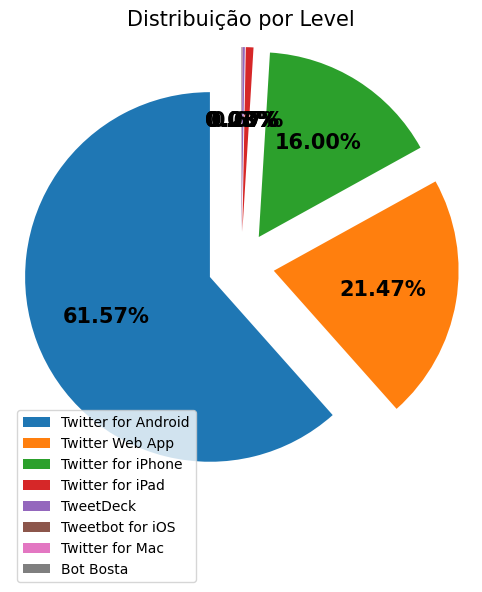

In [11]:
df_tipo_level = df_politico['source'].value_counts()
fig,ax = plt.subplots(figsize=(10,6), subplot_kw=dict(aspect='equal'))
level_data = df_tipo_level.values
legenda_lvl = df_tipo_level.index


wedges,texts,autotexts = ax.pie(level_data, autopct='%0.2f%%',textprops=dict(color='black'), explode=exp, startangle = 90 )

ax.legend(wedges,df_politico['source'].unique(),
          loc='center left',
          fontsize=10,
          bbox_to_anchor=(0,0,0,0))

plt.setp(autotexts, size=15,weight='bold')
ax.set_title('Distribuição por Level', fontsize=15)

plt.show()

### Rashtags utilizadas

In [12]:
df_politico['hashtags'].value_counts()

['cassado']                                                        5
['Brasília']                                                       4
['IdentificaTerrorista']                                           4
['URGENTE']                                                        3
['Capitalismo', 'Mata']                                            2
['ForaLula']                                                       2
['AlexandreDeMoraesNaCadeia']                                      1
['STF', 'IbaneisRocha', 'DistritoFederal']                         1
['CBNEMFOCO']                                                      1
['LulaLadraoSeuLugarENaPrisao']                                    1
['alexandredemoraes', 'STF', 'DistritoFederal', 'ibaneisrocha']    1
['Moro']                                                           1
['GreveGeralBrasil']                                               1
['TikTok']                                                         1
['Xandão', 'Bolsonaro', 'bolsonari

### Linhas duplicadas

In [13]:
df_politico.duplicated().sum()

83

Remoção dos Duplicados

In [14]:
print(df_politico.duplicated().sum(),'registros duplicados removidos.')
df_politico = df_politico.drop_duplicates()

83 registros duplicados removidos.


In [15]:
#pip install -U numpy

In [16]:
from urllib import request
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import json
from sklearn.cluster import KMeans

import gensim

import re
from nltk.corpus import stopwords

import string

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from textblob.sentiments import NaiveBayesAnalyzer
import textblob

from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

import seaborn as sns 
from sklearn.decomposition import PCA

C:\Users\ozeas\AppData\Local\Temp\ipykernel_12704\1425470732.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


### Download StopWords

In [17]:
#Download Stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.download('all')

In [18]:
#StopWords lista de stopwords
pt_stops = stopwords.words('portuguese')

In [19]:
from unidecode import unidecode

In [20]:
def preprocessamento(doc):

    saida_preproc = re.findall("\w+(?:'\w+)?|[^\w\s]", doc)
    saida_preproc = [t.lower() for t in saida_preproc]    
    stops_pt =  stopwords.words('portuguese')
    saida_preproc = [t for t in saida_preproc if t not in stops_pt]    
    saida_preproc = [re.sub(r"\d","",t) for t in saida_preproc]  
    saida_preproc = [t for t in saida_preproc if t not in string.punctuation]  
    saida_preproc = [unidecode(t) for t in saida_preproc]
    saida_preproc = [re.sub(r"[^\w\s]", "", t) for t in saida_preproc]
    saida_preproc = [re.sub(r"','", "", t) for t in saida_preproc]
    return saida_preproc

In [20]:
def preprocessamento(doc):

    saida_preproc = re.findall("\w+(?:'\w+)?|[^\w\s]", doc)
    saida_preproc = [t.lower() for t in saida_preproc]    
    stops_pt =  stopwords.words('portuguese')
    saida_preproc = [t for t in saida_preproc if t not in stops_pt]    
    saida_preproc = [re.sub(r"\d","",t) for t in saida_preproc]  
    saida_preproc = [t for t in saida_preproc if t not in string.punctuation]  
    saida_preproc = [unidecode(t) for t in saida_preproc]
    return saida_preproc


#saida_preproc = [preprocessamento(doc) for doc in df_politico['text']]
#saida_preproc


#nltk.download("stopwords")

In [21]:
df_politico['texto_sem_stopwords'] = df_politico['text'].progress_apply(preprocessamento)
df_politico['texto_sem_stopwords'].iloc[0]

  0%|          | 0/2917 [00:00<?, ?it/s]

['rt',
 'fiuzafirmao',
 '',
 'tse',
 'garantiu',
 'eleicoes',
 'imparciais',
 'transparentes',
 'stf',
 'presos',
 'politicos',
 'senado',
 'omisso',
 'conivente',
 'alexa',
 '...']

In [22]:
for i in df_politico['texto_sem_stopwords']:
    for j in i:
        j = j.replace("'",'').replace("[","").replace("]","")


In [23]:
df_politico['texto_sem_stopwords'] = df_politico['texto_sem_stopwords'].astype(pd.StringDtype())

In [24]:
df_politico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_location        1562 non-null   object
 1   user_description     2064 non-null   object
 2   date                 2917 non-null   object
 3   text                 2917 non-null   object
 4   hashtags             31 non-null     object
 5   source               2917 non-null   object
 6   texto_sem_stopwords  2917 non-null   string
dtypes: object(6), string(1)
memory usage: 182.3+ KB


In [25]:
all_words_lem = ' '.join([word for word in df_politico['texto_sem_stopwords']])

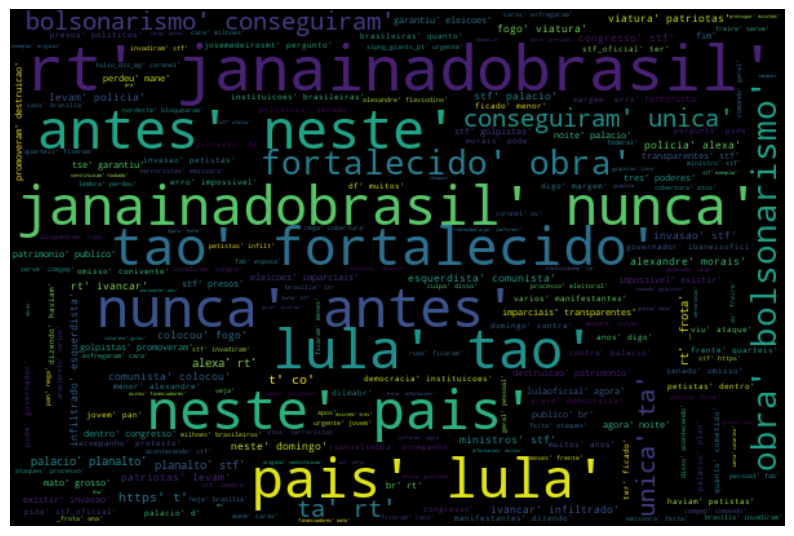

In [26]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [27]:
token = nltk.word_tokenize(all_words_lem)

In [28]:
freq_termos_tokens = FreqDist(token)

In [29]:
freq_termos_tokens.most_common(20)

[("'", 46647),
 (',', 40848),
 ('[', 2917),
 ("'rt", 2917),
 (']', 2917),
 ('...', 2900),
 ("'lula", 2766),
 ("'neste", 2762),
 ("'nunca", 2760),
 ("'tao", 2760),
 ("'antes", 2759),
 ("'pais", 2755),
 ("'ta", 2755),
 ("'janainadobrasil", 2754),
 ("'fortalecido", 2754),
 ("'obra", 2754),
 ("'bolsonarismo", 2754),
 ("'conseguiram", 2754),
 ("'unica", 2754),
 ("'stf", 89)]

In [30]:
df_politico

,user_location,user_description,date,text,hashtags,source,texto_sem_stopwords
0,"São Paulo, Brasil",O que importa são suas ATITUDES perante a VIDA...,2023-01-09 14:36:18+00:00,RT @Fiuzafirmao2: 📍O TSE não garantiu eleições...,NaN,Twitter for Android,"['rt', 'fiuzafirmao', '', 'tse', 'garantiu', '..."
1,NaN,"Brasil acima de tudo, DEUS acima de todos!!!\n...",2023-01-09 14:36:18+00:00,RT @monark: A culpa disso que está acontecendo...,NaN,Twitter for Android,"['rt', 'monark', 'culpa', 'disso', 'acontecend..."
2,-A,7•27 - fã account ° trabalhada no odio o dia i...,2023-01-09 14:36:18+00:00,RT @dilmabr: Nunca se viu um ataque tão grave ...,NaN,Twitter for Android,"['rt', 'dilmabr', 'nunca', 'viu', 'ataque', 't..."
3,Brasil,NaN,2023-01-09 14:36:17+00:00,"RT @Tulio_DIV_MG: Esse é o coronel Av Freire, ...",NaN,Twitter Web App,"['rt', 'tulio_div_mg', 'coronel', 'av', 'freir..."
4,"Sorocaba, Brasil","Cristão, casado, pai, nacionalista, professor",2023-01-09 14:36:17+00:00,RT @alefreitasdep: O TSE não garantiu eleições...,NaN,Twitter for Android,"['rt', 'alefreitasdep', 'tse', 'garantiu', 'el..."
...,...,...,...,...,...,...,...
2995,NaN,Yo sé muy bien que el Señor nuestro Dios es má...,2023-01-09 14:18:49+00:00,"RT @JanainaDoBrasil: Nunca antes neste País, L...",NaN,Twitter Web App,"['rt', 'janainadobrasil', 'nunca', 'antes', 'n..."
2996,BTS.,"eu, sza, selena e lana passeando no shopping\n...",2023-01-09 14:18:49+00:00,"RT @JanainaDoBrasil: Nunca antes neste País, L...",NaN,Twitter for Android,"['rt', 'janainadobrasil', 'nunca', 'antes', 'n..."
2997,NaN,🚩Rebeldemente Leal 🇻🇪,2023-01-09 14:18:48+00:00,"RT @JanainaDoBrasil: Nunca antes neste País, L...",NaN,Twitter for iPhone,"['rt', 'janainadobrasil', 'nunca', 'antes', 'n..."
2998,NaN,NaN,2023-01-09 14:18:48+00:00,"RT @JanainaDoBrasil: Nunca antes neste País, L...",NaN,Twitter for iPhone,"['rt', 'janainadobrasil', 'nunca', 'antes', 'n..."
